In [12]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\Xtras\Top_CpGWithFeat_RanFor
df1 = pd.read_csv ('Any2Common_inAll45Feats_Data_Female.csv')
df2 = pd.read_csv ('Top50CpGFromEachFeat_Female.csv')
df = pd.merge(df1, df2, on = 'PATNO', how = 'inner')
print(df.shape)
df.head(2)
df.to_csv('Top50CpGFromEachFeat_withFeaturesFemale.csv', index = False)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\Xtras\Top_CpGWithFeat_RanFor
(50, 375)


In [3]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\Xtras\Top_CpGWithFeat_RanFor
df1 = pd.read_csv ('Any2Common_inAll45Feats_Data_Female.csv')
df2 = pd.read_csv ('NMI_Methylome_Female13_Data.csv')
df = pd.merge(df1, df2, on = 'PATNO', how = 'inner')
print(df.shape)
df.to_csv('NMI13_Methylome_withFeaturesFemale.csv', index = False)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\Xtras\Top_CpGWithFeat_RanFor
(50, 342)


,PATNO,APPRDX,MDSP_Constipate,Montreal_Cognitive,UPSIT,MDSP_Pain,SCOPA_Gastro,Lexical_Fluency,MDSP_Urine,STAIS,...,cg10304506,cg01276843,cg26470958,cg05389652,cg10387956,cg25562059,cg16123908,cg23060256,cg16670864,cg02294563
0,3002,1,1,0,2,1,1,1,1,2,...,0.867486,0.888180,0.924157,0.795173,0.857429,0.76651,0.899257,0.855902,0.064308,0.434085
1,3008,2,0,0,0,1,0,1,1,1,...,0.842123,0.878149,0.920000,0.861985,0.830693,0.80878,0.921107,0.827401,0.086812,0.377451


In [14]:
df1 = pd.read_csv ('NMI_Methylome_Female13_Data.csv')
df2 = pd.read_csv ('Top50CpGFromEachFeat_Female.csv')
# get the common columns
common_cols = set(df1.columns).intersection(set(df2.columns))
# create a new dataframe with only the common columns
df_common = df1[list(common_cols)]
df_common['APPRDX'] = df2['APPRDX'] 
# print the common columns for the new dataframe
print(df_common.shape)
df_common.head(2)

(150, 14)


C:\Users\system 4\AppData\Local\Temp\ipykernel_724\1573169573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_common['APPRDX'] = df2['APPRDX']


,cg18117347,cg02699069,cg02992048,cg10695325,cg18248290,cg14587401,PATNO,cg20080383,cg17594730,cg02488409,cg23865342,cg26889735,cg24752563,APPRDX
0,0.123347,0.048809,0.896164,0.061271,0.898221,0.040657,3000,0.612919,0.960879,0.919769,0.902565,0.862922,0.368998,2
1,0.156355,0.043996,0.879891,0.076813,0.913113,0.036688,3002,0.644179,0.905597,0.921580,0.896196,0.893980,0.631837,1


In [15]:
df_common.to_csv('CommonCpg_inNMI13AndTop50s_Female.csv', index = False)

In [4]:
df = pd.read_csv('Top50CpGFromEachFeat_withFeaturesFemale.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(50, 374)


,APPRDX,MDSP_Constipate,Montreal_Cognitive,UPSIT,MDSP_Pain,SCOPA_Gastro,Lexical_Fluency,MDSP_Urine,STAIS,cg00143308,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
0,0,1,0,2,1,1,1,1,2,0.85266,...,0.771254,0.071882,0.042511,0.729550,0.791456,0.647416,0.024404,0.076366,0.011557,0.039371
1,1,0,0,0,1,0,1,1,1,0.74278,...,0.667309,0.035031,0.016389,0.742035,0.877402,0.587296,0.027708,0.060278,0.066433,0.043416


In [5]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(10))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.85
2
Mean accuracy: 0.65
3
Mean accuracy: 0.9
4
Mean accuracy: 0.7
5
Mean accuracy: 0.85
6
Mean accuracy: 0.7
7
Mean accuracy: 0.65
8
Mean accuracy: 0.6
9
Mean accuracy: 0.75
10
Mean accuracy: 0.8
11
Mean accuracy: 0.75
12
Mean accuracy: 0.8
13
Mean accuracy: 0.9
14
Mean accuracy: 0.85
15
Mean accuracy: 0.55
16
Mean accuracy: 0.7
17
Mean accuracy: 0.85
18
Mean accuracy: 0.6
19
Mean accuracy: 0.75
20
Mean accuracy: 0.7
21
Mean accuracy: 0.75
22
Mean accuracy: 0.75
23
Mean accuracy: 0.55
24
Mean accuracy: 0.65
25
Mean accuracy: 0.65
26
Mean accuracy: 0.9
27
Mean accuracy: 0.6
28
Mean accuracy: 0.75
29
Mean accuracy: 0.85
30
Mean accuracy: 0.8
31
Mean accuracy: 0.8
32
Mean accuracy: 0.75
33
Mean accuracy: 0.6
34
Mean accuracy: 0.8
35
Mean accuracy: 0.8
36
Mean accuracy: 0.7
37
Mean accuracy: 0.7
38
Mean accuracy: 0.75
39
Mean accuracy: 0.75
40
Mean accuracy: 0.6
41
Mean accuracy: 0.75
42
Mean accuracy: 0.65
43
Mean accuracy: 0.75
44
Mean accuracy: 0.75
45
Mean accuracy:

In [6]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("Top50CpGFromEachFeat_withFeaturesFemale_100RF.csv", index=False)

0.7455000000000002


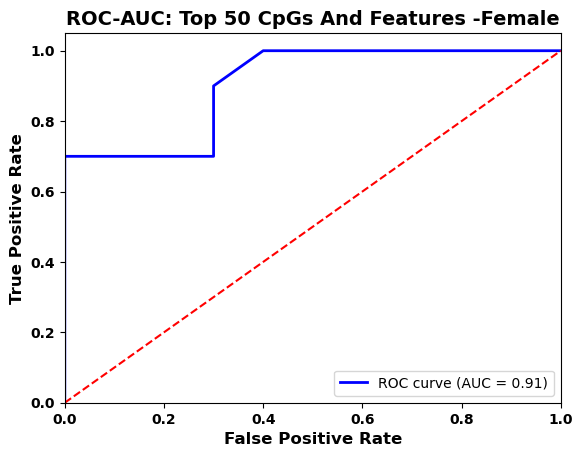

In [7]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(10, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Top 50 CpGs And Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Top50CpGFromEachFeat_withFeaturesFemale.svg')
plt.savefig('ROC_AUC_Top50CpGFromEachFeat_withFeaturesFemale.pdf')
plt.show()


In [8]:
df = pd.read_csv('NMI13_Methylome_withFeaturesFemale.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(50, 341)


,APPRDX,MDSP_Constipate,Montreal_Cognitive,UPSIT,MDSP_Pain,SCOPA_Gastro,Lexical_Fluency,MDSP_Urine,STAIS,cg15487922,...,cg10304506,cg01276843,cg26470958,cg05389652,cg10387956,cg25562059,cg16123908,cg23060256,cg16670864,cg02294563
0,0,1,0,2,1,1,1,1,2,0.771991,...,0.867486,0.888180,0.924157,0.795173,0.857429,0.76651,0.899257,0.855902,0.064308,0.434085
1,1,0,0,0,1,0,1,1,1,0.787123,...,0.842123,0.878149,0.920000,0.861985,0.830693,0.80878,0.921107,0.827401,0.086812,0.377451


In [9]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(10))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.85
2
Mean accuracy: 0.7
3
Mean accuracy: 0.85
4
Mean accuracy: 0.7
5
Mean accuracy: 0.65
6
Mean accuracy: 0.6
7
Mean accuracy: 0.65
8
Mean accuracy: 0.55
9
Mean accuracy: 0.75
10
Mean accuracy: 0.65
11
Mean accuracy: 0.6
12
Mean accuracy: 0.8
13
Mean accuracy: 0.8
14
Mean accuracy: 0.85
15
Mean accuracy: 0.75
16
Mean accuracy: 0.7
17
Mean accuracy: 0.9
18
Mean accuracy: 0.65
19
Mean accuracy: 0.85
20
Mean accuracy: 0.75
21
Mean accuracy: 0.85
22
Mean accuracy: 0.7
23
Mean accuracy: 0.55
24
Mean accuracy: 0.6
25
Mean accuracy: 0.75
26
Mean accuracy: 0.85
27
Mean accuracy: 0.65
28
Mean accuracy: 0.8
29
Mean accuracy: 0.8
30
Mean accuracy: 0.75
31
Mean accuracy: 0.7
32
Mean accuracy: 0.75
33
Mean accuracy: 0.8
34
Mean accuracy: 0.75
35
Mean accuracy: 0.75
36
Mean accuracy: 0.8
37
Mean accuracy: 0.65
38
Mean accuracy: 0.65
39
Mean accuracy: 0.7
40
Mean accuracy: 0.6
41
Mean accuracy: 0.8
42
Mean accuracy: 0.75
43
Mean accuracy: 0.9
44
Mean accuracy: 0.75
45
Mean accuracy

In [10]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI13_Methylome_withFeaturesFemale_100RF.csv", index=False)

0.7285


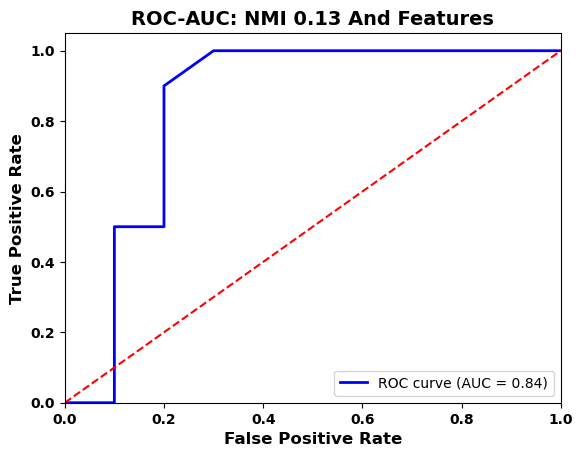

In [11]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(10, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI 0.13 And Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI13_Methylome_withFeaturesFemale.svg')
plt.savefig('ROC_AUC_NMI13_Methylome_withFeaturesFemale.pdf')
plt.show()


## Common CpG in NMI and Top50s in 8 Feats

In [16]:
df = pd.read_csv('CommonCpg_inNMI13AndTop50s_Female.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(150, 13)


,APPRDX,cg18117347,cg02699069,cg02992048,cg10695325,cg18248290,cg14587401,cg20080383,cg17594730,cg02488409,cg23865342,cg26889735,cg24752563
0,1,0.123347,0.048809,0.896164,0.061271,0.898221,0.040657,0.612919,0.960879,0.919769,0.902565,0.862922,0.368998
1,0,0.156355,0.043996,0.879891,0.076813,0.913113,0.036688,0.644179,0.905597,0.921580,0.896196,0.893980,0.631837


In [17]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7
2
Mean accuracy: 0.7333333333333334
3
Mean accuracy: 0.7833333333333334
4
Mean accuracy: 0.8166666666666667
5
Mean accuracy: 0.7166666666666667
6
Mean accuracy: 0.6833333333333333
7
Mean accuracy: 0.8
8
Mean accuracy: 0.8166666666666667
9
Mean accuracy: 0.8833333333333332
10
Mean accuracy: 0.7833333333333333
11
Mean accuracy: 0.8166666666666667
12
Mean accuracy: 0.7666666666666666
13
Mean accuracy: 0.8166666666666667
14
Mean accuracy: 0.7
15
Mean accuracy: 0.7
16
Mean accuracy: 0.7666666666666666
17
Mean accuracy: 0.7833333333333333
18
Mean accuracy: 0.7666666666666667
19
Mean accuracy: 0.7666666666666666
20
Mean accuracy: 0.7666666666666666
21
Mean accuracy: 0.7333333333333333
22
Mean accuracy: 0.7166666666666667
23
Mean accuracy: 0.8166666666666667
24
Mean accuracy: 0.75
25
Mean accuracy: 0.6833333333333333
26
Mean accuracy: 0.7999999999999999
27
Mean accuracy: 0.7666666666666666
28
Mean accuracy: 0.75
29
Mean accuracy: 0.6666666666666667
30
Mean accuracy: 0.65
3

In [18]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("CommonCpg_inNMI13AndTop50s_Female_100RF.csv", index=False)

0.7551666666666668


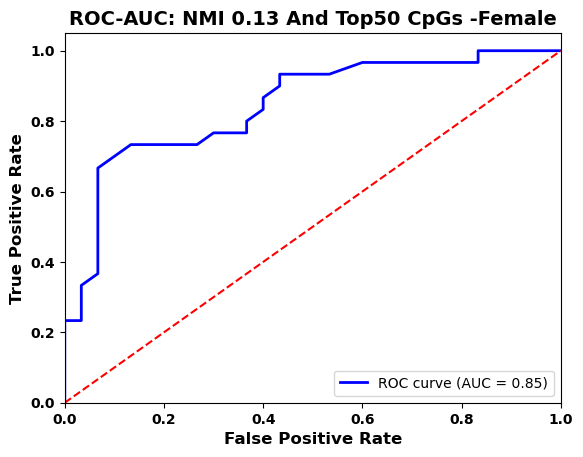

In [20]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI 0.13 And Top50 CpGs -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI13_AndTop50CpGs_Female.svg')
plt.savefig('ROC_AUC_NMI13_AndTop50CpGs_Female.pdf')
plt.show()


In [24]:
df1 = pd.read_csv ('CommonCpg_inNMI13AndTop50s_Female.csv')
df2 = pd.read_csv ('Any2Common_inAll45Feats_Data_Female_t.csv')
df = pd.merge(df1, df2, on = 'PATNO', how = 'inner')
print(df.shape)
df.to_csv('CommonCpg_inNMI13AndTop50s_withFeaturesFemale.csv', index = False)
df.head(2)

(50, 22)


,PATNO,APPRDX,cg18117347,cg02699069,cg02992048,cg10695325,cg18248290,cg14587401,cg20080383,cg17594730,...,cg26889735,cg24752563,MDSP_Constipate,Montreal_Cognitive,UPSIT,MDSP_Pain,SCOPA_Gastro,Lexical_Fluency,MDSP_Urine,STAIS
0,3002,1,0.156355,0.043996,0.879891,0.076813,0.913113,0.036688,0.644179,0.905597,...,0.893980,0.631837,1,0,2,1,1,1,1,2
1,3008,2,0.095654,0.036020,0.879386,0.040422,0.878512,0.038382,0.520036,0.933831,...,0.864489,0.539710,0,0,0,1,0,1,1,1


In [25]:
df = pd.read_csv('CommonCpg_inNMI13AndTop50s_withFeaturesFemale.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(50, 21)


,APPRDX,cg18117347,cg02699069,cg02992048,cg10695325,cg18248290,cg14587401,cg20080383,cg17594730,cg02488409,...,cg26889735,cg24752563,MDSP_Constipate,Montreal_Cognitive,UPSIT,MDSP_Pain,SCOPA_Gastro,Lexical_Fluency,MDSP_Urine,STAIS
0,0,0.156355,0.043996,0.879891,0.076813,0.913113,0.036688,0.644179,0.905597,0.921580,...,0.893980,0.631837,1,0,2,1,1,1,1,2
1,1,0.095654,0.036020,0.879386,0.040422,0.878512,0.038382,0.520036,0.933831,0.890442,...,0.864489,0.539710,0,0,0,1,0,1,1,1


In [26]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(10))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.75
2
Mean accuracy: 0.75
3
Mean accuracy: 0.8
4
Mean accuracy: 0.75
5
Mean accuracy: 0.75
6
Mean accuracy: 0.7
7
Mean accuracy: 0.75
8
Mean accuracy: 0.7
9
Mean accuracy: 0.95
10
Mean accuracy: 0.7
11
Mean accuracy: 0.8
12
Mean accuracy: 0.8
13
Mean accuracy: 0.6
14
Mean accuracy: 0.6
15
Mean accuracy: 0.7
16
Mean accuracy: 0.6
17
Mean accuracy: 0.7
18
Mean accuracy: 0.6
19
Mean accuracy: 0.75
20
Mean accuracy: 0.45
21
Mean accuracy: 0.7
22
Mean accuracy: 0.65
23
Mean accuracy: 0.6
24
Mean accuracy: 0.6
25
Mean accuracy: 0.7
26
Mean accuracy: 0.65
27
Mean accuracy: 0.35
28
Mean accuracy: 0.65
29
Mean accuracy: 0.65
30
Mean accuracy: 0.95
31
Mean accuracy: 0.9
32
Mean accuracy: 0.7
33
Mean accuracy: 0.7
34
Mean accuracy: 0.75
35
Mean accuracy: 0.6
36
Mean accuracy: 0.8
37
Mean accuracy: 0.75
38
Mean accuracy: 0.75
39
Mean accuracy: 0.6
40
Mean accuracy: 0.8
41
Mean accuracy: 0.75
42
Mean accuracy: 0.65
43
Mean accuracy: 0.6
44
Mean accuracy: 0.75
45
Mean accuracy: 0.8

In [27]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("CommonCpg_inNMI13AndTop50s_withFeaturesFemale_100RF.csv", index=False)

0.7050000000000002


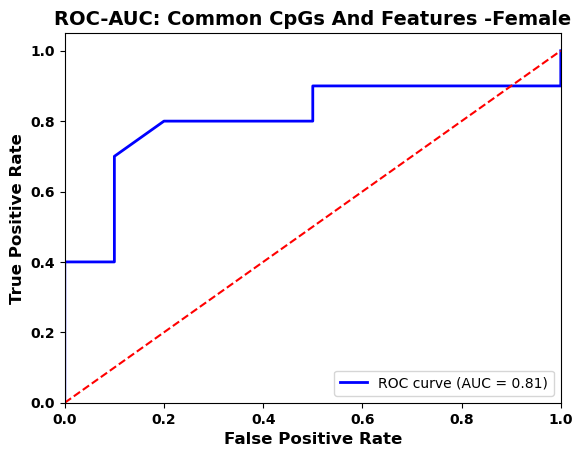

In [28]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(10, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Common CpGs And Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_CommonCpGsAndFeats_Female.svg')
plt.savefig('ROC_AUC_CommonCpGsAndFeats_Female.pdf')
plt.show()
